Importing CSV and libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1> EDA on Fuel Consumption by Vehicles 

The Dataset has been found on Kaggle and it contains various details relating to Fuel consumption by Engines, WE will be performing Data Analysis on this Dataset to find some trends which will be informative for us
 

In [19]:
df = pd.read_csv("../Fuel_Consumption_Ratings_2023.csv",encoding='latin-1')
df

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,2023,Volvo,XC40 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.2,7.9,9.2,31,215,5,5
829,2023,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,8.2,9.4,30,218,5,5
830,2023,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.1,8.7,10.0,28,233,5,7
831,2023,Volvo,XC90 B5 AWD,SUV: Standard,2.0,4,AS8,Z,10.5,8.4,9.6,29,223,5,5


In [20]:
df['Fuel Type'].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

Data Cleaning

In [21]:
df.isna().value_counts()
#None of the values are N/A.

Year   Make   Model  Vehicle Class  Engine Size (L)  Cylinders  Transmission  Fuel Type  Fuel Consumption (L/100Km)  Hwy (L/100 km)  Comb (L/100 km)  Comb (mpg)  CO2 Emissions (g/km)  CO2 Rating  Smog Rating
False  False  False  False          False            False      False         False      False                       False           False            False       False                 False       False          833
Name: count, dtype: int64

In [22]:
duplicates = df[df.duplicated()] # finding Duplicates
duplicates

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating


Explanatory Data Analysis

In [23]:
df.describe()

,Year,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.0,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2023.0,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,0.0,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,2023.0,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,2023.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


Make
Ford             13
Chevrolet        11
Dodge            10
Mercedes-Benz     8
Rolls-Royce       7
Audi              7
GMC               7
Lamborghini       6
Jeep              5
Aston Martin      4
Maserati          4
BMW               4
Cadillac          4
Bentley           4
Bugatti           3
Infiniti          1
Nissan            1
Ram               1
Name: count, dtype: int64


<Axes: xlabel='Make'>

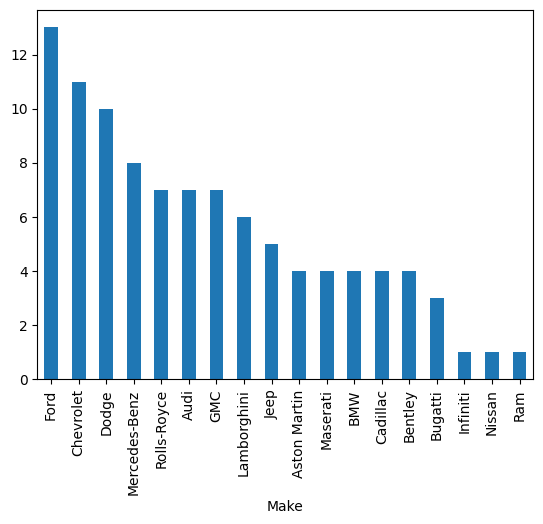

In [24]:
fuelcons_more = pd.DataFrame(df.sort_values(by='Fuel Consumption (L/100Km)',ascending=False))
print(fuelcons_more.head(100).value_counts(df['Make']))
fuelcons_more.head(100).value_counts(df['Make']).plot(kind='bar')



Make
Toyota        22
Honda         11
Hyundai       10
Kia           10
Nissan         9
MINI           8
Mazda          6
Lexus          5
Volkswagen     4
Ford           3
Chevrolet      3
Subaru         3
Buick          2
Acura          2
Mitsubishi     2
Name: count, dtype: int64


<Axes: xlabel='Make'>

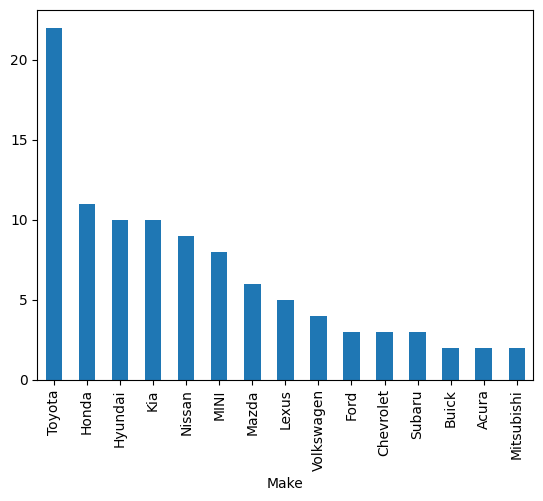

In [25]:
fuelcons_less = pd.DataFrame(df.sort_values(by='Fuel Consumption (L/100Km)',ascending=True))
print(fuelcons_less.head(100).value_counts(df['Make']))
fuelcons_less.head(100).value_counts(df['Make']).plot(kind='bar')

In [27]:
df_Z = df[df['Fuel Type'] == 'Z']
mean_z_co2 = df_Z['CO2 Rating'].mean()
mean_z_smog = df_Z['Smog Rating'].mean()
if mean_z_smog < df['Smog Rating'].mean():
    print("The smog rating for Z type fuel is below the average rating")
else:
    print("The smog rating for Z type fuel is above the average rating")
print(mean_z_smog)
if mean_z_co2 < df['CO2 Rating'].mean():
    print("The CO2 rating for Z type fuel is below the average rating")
else:
    print("The Co2 rating for Z type fuel is above the average rating")
print(mean_z_co2)

The smog rating for Z type fuel is below the average rating
4.625
The CO2 rating for Z type fuel is below the average rating
4.169117647058823


In [28]:
df_X = df[df['Fuel Type'] == 'X']
mean_x_co2 = df_X['CO2 Rating'].mean()
mean_x_smog = df_X['Smog Rating'].mean()
if mean_x_smog < df['Smog Rating'].mean():
    print("The smog rating for X type fuel is below the average rating")
else:
    print("The smog rating for X type fuel is above the average rating")
print(mean_x_smog)
if mean_x_co2 < df['CO2 Rating'].mean():
    print("The CO2 rating for X type fuel is below the average rating")
else:
    print("The Co2 rating for X type fuel is above the average rating")
print(mean_x_co2)

The smog rating for X type fuel is above the average rating
5.987179487179487
The Co2 rating for X type fuel is above the average rating
4.933333333333334


In [29]:
df_D = df[df['Fuel Type'] == 'D']
mean_D_co2 = df_D['CO2 Rating'].mean()
mean_D_smog = df_D['Smog Rating'].mean()
if mean_D_smog < df['Smog Rating'].mean():
    print("The smog rating for D type fuel is below the average rating")
else:
    print("The smog rating for D type fuel is above the average rating")
print(mean_D_smog)
if mean_D_co2 < df['CO2 Rating'].mean():
    print("The CO2 rating for D type fuel is below the average rating")
else:
    print("The Co2 rating for D type fuel is above the average rating")
print(mean_D_co2)

The smog rating for D type fuel is below the average rating
3.1
The CO2 rating for D type fuel is below the average rating
4.15


In [30]:
df_E = df[df['Fuel Type'] == 'E']
mean_E_co2 = df_E['CO2 Rating'].mean()
mean_E_smog = df_E['Smog Rating'].mean()
if mean_E_smog < df['Smog Rating'].mean():
    print("The smog rating for E type fuel is below the average rating")
else:
    print("The smog rating for E type fuel is above the average rating")
print(mean_E_smog)
if mean_E_co2 < df['CO2 Rating'].mean():
    print("The CO2 rating for E type fuel is below the average rating")
else:
    print("The Co2 rating for E type fuel is above the average rating")
print(mean_E_co2)

The smog rating for E type fuel is below the average rating
5.2
The CO2 rating for E type fuel is below the average rating
3.933333333333333


Overall Conclusion

hrough an in-depth analysis of the fuel consumption ratings across different engine types and fuel categories, several significant trends have emerged, providing a clearer understanding of the environmental impact and fuel efficiency of modern vehicles.

Key Findings:
Fuel Types and Emission Ratings:

Type X Fuel (Natural Gas):
Among all the fuels analyzed, natural gas stands out as the most environmentally friendly option. Vehicles powered by Type X fuel exhibit significantly lower smog emissions and CO2 emissions compared to other fuel types. This suggests that natural gas is a cleaner alternative, especially in urban areas where reducing air pollution is a priority.

Type D Fuel (Diesel):
While diesel is often praised for its energy density and fuel economy over long distances, it performed poorly in terms of smog emissions. Diesel engines, particularly older models, emit more nitrogen oxides (NOx) and particulate matter, which are key contributors to smog. This makes it the worst fuel type in our dataset for air quality impact, especially in densely populated areas.

Type E Fuel (Ethanol (E85)):
Though ethanol-based fuels like E85 are considered renewable and can reduce dependence on fossil fuels, their environmental benefits come with caveats. Ethanol (E85) vehicles showed the highest levels of CO2 emissions among the fuels examined, making them the least effective in combating climate change. This highlights the complexity of evaluating "green" fuel alternatives.

Manufacturer-Specific Performance:

Ford:
Among the 100 least fuel-efficient vehicles in the dataset, Ford models accounted for 13 of them, marking Ford as a manufacturer with several inefficient vehicles in its lineup. Ford vehicles, on average, consumed more fuel per 100 kilometers than the industry standard, contributing to higher operating costs and a larger environmental footprint.

Toyota:
In contrast, Toyota emerged as a leader in fuel efficiency. Of the 100 most fuel-efficient vehicles in the analysis, 22 were from Toyota’s lineup. Toyota cars, on average, consume less fuel per 100 kilometers than the industry standard, showcasing their focus on engineering vehicles with better fuel economy and lower emissions. This positions Toyota as a brand strongly committed to sustainability and efficiency.

Conclusion:
This analysis reveals that fuel type plays a significant role in determining both the environmental impact and efficiency of a vehicle. While natural gas (Type X Fuel) proves to be the cleanest in terms of emissions, diesel (Type D Fuel) and ethanol (Type E Fuel) come with trade-offs in environmental and climate impacts, respectively. Additionally, from a manufacturer perspective, Toyota is leading the way in producing efficient vehicles, whereas Ford lags behind in this regard, with a notable presence of inefficient models in the market.

These findings could be useful for consumers looking to make environmentally-conscious purchasing decisions and for manufacturers aiming to improve their sustainability performance in the automotive industry.